In [1]:
import scCube
from scCube import scCube
from scCube.visualization import *
from scCube.utils import *
from matplotlib.pyplot import rc_context
import pandas as pd
import scanpy as sc
import numpy as np
import warnings
import time
warnings.filterwarnings("ignore")

/slurm/home/yrd/fanlab/qianjingyang/.conda/envs/sccube/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model = scCube()

In [3]:
# adata and model are downloaded from https://github.com/ZJUFanLab/scCube/blob/main/tutorial/statistics.md
sc_adata = sc.read_h5ad('demo_data/Tabula_Muris_TM_facs_Brain_Non_Myeloid_adata.h5ad')

In [4]:
generate_sc_meta, generate_sc_data = model.load_vae_and_generate_cell(
    sc_adata=sc_adata,
    celltype_key='Cell_type',
    cell_key='Cell',
    target_num=None,
    hidden_size=128,
    load_path='demo_data/Tabula_Muris_TM_facs_Brain_Non_Myeloid_epoch10000.pth',
    used_device='cuda:1')

generating by the proportion of cell types of the input scRNA-seq data...
loading model from demo_data/Tabula_Muris_TM_facs_Brain_Non_Myeloid_epoch10000.pth
vae loading done!


Generate Epoch: 0: 100%|██████████| 3401/3401 [00:00<00:00, 11985.77it/s]


generated done!
data have been prepared!


In [5]:
sc_adata_generate = model.pre_process(sc_data=generate_sc_data, 
                                      sc_meta=generate_sc_meta,
                                      is_normalized=True)

sc.pp.highly_variable_genes(sc_adata_generate, flavor="seurat_v3", n_top_genes=2000)
sc_adata_generate = sc_adata_generate[:, sc_adata_generate.var.highly_variable]
sc.pp.scale(sc_adata_generate, max_value=10)
sc.tl.pca(sc_adata_generate, svd_solver='arpack')
sc.pp.neighbors(sc_adata_generate)
sc.tl.umap(sc_adata_generate)

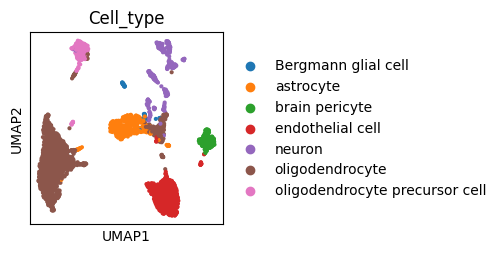

In [6]:
with rc_context({'figure.figsize': (2.5, 2.5)}):
    sc.pl.umap(sc_adata_generate, color='Cell_type')

In [7]:
# generate 3d spatial patterns
generate_sc_data_new, generate_sc_meta_new = model.generate_pattern_random(
    generate_sc_data=generate_sc_data,
    generate_sc_meta=generate_sc_meta,
    set_seed=True,
    seed=12345,
    spatial_cell_type=None,
    spatial_dim=3,
    spatial_size=20,
    delta=25,
    lamda=0.75,
    is_split=True, # split the three-dimensional SRT data into a user-defined number of two-dimensional SRT data along `point_z` axis of coordinates
    split_coord='point_z',
    slice_num=5,)

generating spatial coordinates of single cells...
generating spatial patterns of totally 7 cell types...


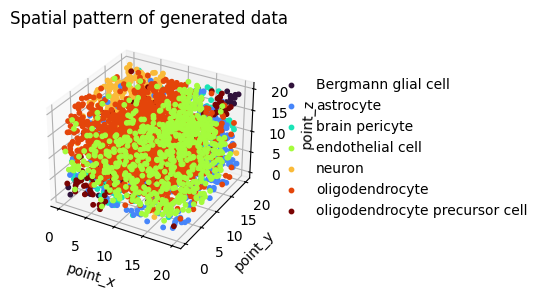

In [8]:
plot_spatial_pattern_scatter(
    obj=generate_sc_meta_new,
    figwidth=3,
    figheight=3,
    dim=3,
    x="point_x",
    y="point_y",
    z="point_z",
    label='Cell_type',
    colormap='turbo',
    size=10,
    alpha=1)
plt.show()

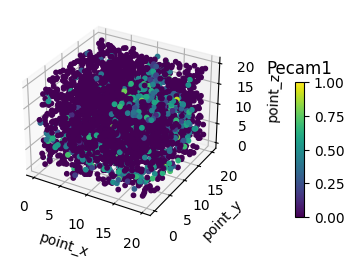

In [9]:
plot_gene_scatter(
    data=generate_sc_data_new,
    obj=generate_sc_meta_new,
    figwidth=3,
    figheight=2.5,
    dim=3,
    label='Cell',
    normalize=True,
    x="point_x",
    y="point_y",
    z="point_z",
    show_gene="Pecam1",
    colormap='viridis',
    size=10,
    alpha=1
)
plt.show()

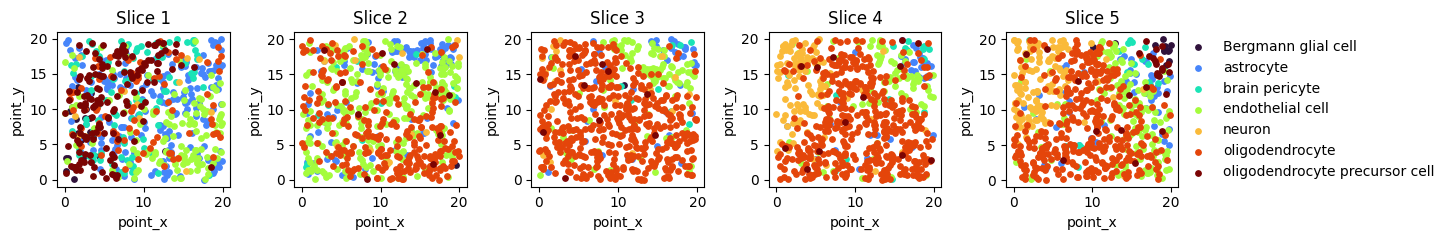

In [10]:
plot_slice_scatter(
    obj=generate_sc_meta_new,
    figwidth=12,
    figheight=2.5,
    x="point_x",
    y="point_y",
    label='Cell_type',
    colormap='turbo',
    size=15,
    alpha=1
)
plt.show()

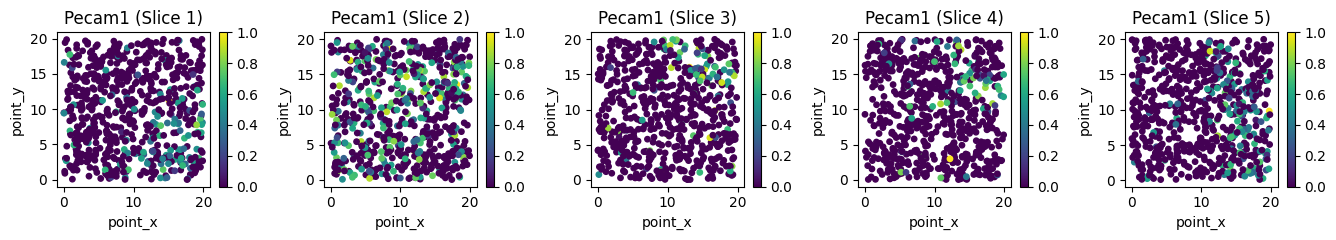

In [11]:
generate_sc_meta_new.reset_index(drop = True,inplace = True)
plot_slice_gene_scatter(
    data=generate_sc_data_new,
    obj=generate_sc_meta_new,
    figwidth=13.5,
    figheight=2.5,
    normalize=True,
    x="point_x",
    y="point_y",
    show_gene="Pecam1",
    colormap='viridis',
    size=15,
    alpha=1

)
plt.show()